# 4. Geth, 계정

Last Updated 20200406MON1001 20190403WED0000 20180717TUE1700 201801231MON1800 20160207

* digital sig: verification, python library (bitcoin, eth_ ...)

## 학습내용

### 목표

- geth eth, admin, miner, personal 명령어 학습
- geth 계정, 해싱, 디지털서명 학습


### 목차

4 Geth, 계정
* 4.1 Geth basic commands
* 4.1.1 eth 명령어
* 4.1.2 admin 명령어
* 4.1.3 miner 명령어
* 4.1.4 personal 명령어
* 4.2 [계정](#4.2)
* 4.2.1 계정의 종류
    * 개인 계정
    * 계약 계정
* 4.2.2 address 생성
    * 주소 생성 절차
    * private key 생성
    * private key에서 public key 생성
    * public key에서 주소 생성
    * 주소 파일
    * WIF
* 4.2.3 계정의 속성
    * balance
    * nonce
    * storageRoot
    * codeHash
* 문제 4-1: [계정을 생성하기](#4-1)
* 문제 4-2: [계정을 coinbase로 정하기](#4-2)

* 4.2.4 해싱
    * 4.2.5 디지털서명
    * ECDSA
    * Elliptic curve 연산
    * 더하기 연산으로 구하는 PubKey
    * 유한체 Elliptic curve
    * secp256k1
* 문제 4-3: [마이닝 해보기](#4-3)

* 4.2.6 Wallet


## 4.1 Geth

Geth는 **G**o로 구현된 **eth**ereum이라는 앞 글자를 따와서 이름이 붙여졌다.
앞서 배웠듯이, Geth를 실행하면 네트워크에 접속이 되고 자신을 이더리움 노드로 만든다.
그렇다고 Geth는 이러한 접속 도구만으로 쓰이지는 않는다.
Geth는 접속한 후, 블록체인에 대한 클라이언트 역할도 한다.
분산시스템에는 서버라고 하는 개념이 없지만, 서버에 대한 클라이언트로 생각하는 편이 좋다. 서버는 서비스를 제공하고, 클라이언트는 이를 요청하는 주종관계가 없다. 분산시스템은 참여하는 모든 노드가 서버가 된다.
Geth는 콘솔을 열어서 자바스크립트 프로그램을 할 수 있는데,
블록체인에 프로그램을 배포하거나, 마이닝하거나, 상태를 파악하는 등 블록체인에 대한 여러 기능을 활용할 수 있다.


### 4.1.1 eth 명령어

아래는 eth 모듈에서 제공하는 API이다. 계정, 블록, gas, 트랜잭션, 디지털사인 관련 명령을 제공한다.

```python
eth._requestManager            eth.getAccounts                eth.getProtocolVersion         eth.isSyncing
eth.accounts                   eth.getBalance                 eth.getRawTransaction          eth.mining
eth.blockNumber                eth.getBlock                   eth.getRawTransactionFromBlock eth.namereg
eth.call                       eth.getBlockNumber             eth.getStorageAt               eth.pendingTransactions
eth.chainId                    eth.getBlockTransactionCount   eth.getSyncing                 eth.protocolVersion
eth.coinbase                   eth.getBlockUncleCount         eth.getTransaction             eth.resend
eth.compile                    eth.getCode                    eth.getTransactionCount        eth.sendIBANTransaction
eth.constructor                eth.getCoinbase                eth.getTransactionFromBlock    eth.sendRawTransaction
eth.contract                   eth.getCompilers               eth.getTransactionReceipt      eth.sendTransaction
eth.defaultAccount             eth.getGasPrice                eth.getUncle                  
eth.sign                       eth.defaultBlock               eth.getHashrate                eth.getWork                    eth.signTransaction            eth.estimateGas                eth.getMining                  eth.hashrate                   eth.submitTransaction
eth.filter                     eth.getPendingTransactions     eth.iban                       eth.submitWork                 eth.gasPrice                   eth.getProof                   eth.icapNamereg                eth.syncing
```

단말을 두 개 열어서 사용하자. 하나는 ```_gethNow```를 실행하여 콘솔없는 geth를 띄운다 (명령창A)
또 다른 단말은 ```geth attach http://localhost:8445```로 콘솔있는 geth를 열어놓는다 (명령창B).

앞서 계정을 생성해 놓았고, 그 계정을 명령창B에서 출력해보자. 계정이 여러개 있다면 인덱스로 순서를 정할 수 있다.
```python
> eth.accounts
["0xc8ea4c4e655f8152adc075a649aa7ec35564c7c0", "0x4fa2c7caac80a8518264d263bdb5ed74f1a6f398"]
> eth.accounts[0]
"0xc8ea4c4e655f8152adc075a649aa7ec35564c7c0"
```

계정의 잔고를 알아보자. 모든 계좌의 잔고는 없고, 그런 것이 당연하다 하겠다.
```python
> eth.getBalance(eth.accounts[0]);
0
> eth.getBalance(eth.accounts[1]);
0
```

계좌에 잔고가 없으면 거래를 하거나, 프로그램을 블록체인에 올리거나 하는 일도 할 수 없다. 마이닝을 통해서 충전을 해보자. ```miner.start()```를 실행하고, 또 다른 명령창A에서는 어떤 변화가 있는지 살펴보자. 수 분만에 다음과 같이 5 ether가 입금되었고, 그 금액은 마이닝이 실행되면서 늘어나고 있다. 어느 정도 충전이 되었으면 ```miner.stop()```으로 중단하기로 한다. main, testnet에서는 마이닝이 언제나 실행되고 있으므로 별도의 마이닝이 필요없겠지만, 사설망에서는 CPU나 메모리가 마이닝 작업으로 인해 느려지는 것을 막기 위해서는 필요한 경우에만 마이닝을 켜고 끌 수가 있다.
```python
> miner.start();
null
>
> eth.getBalance(eth.accounts[0]);
> eth.getBalance(eth.accounts[0]);
5000000000000000000
> eth.getBalance(eth.accounts[0]);
60000000000000000000
> eth.getBalance(eth.accounts[0]);
80000000000000000000
> eth.getBalance(eth.accounts[0]);
285000000000000000000
> miner.stop();
null
```

앞서 충전된 금액의 단위는 Wei이다. 이를 ether로 변환해보자.
```python
> web3.fromWei(bal,"ether")
285
```

블록이 몇 개나 있는지 알아보자. 57개가 생성되었다. 블록이 생성이 되었다는 것은 마이닝이 그만큼 되었다는 의미이고, 그 보상이 계좌에 입금된 것이다. coinbase 또는 etherbase는 입출금이 일어나는 자신의 주 계정을 말한다.
```python
> eth.blockNumber;
57
> eth.coinbase
"0xc8ea4c4e655f8152adc075a649aa7ec35564c7c0"
```

지금까지는 eth 콘솔에서의 작업이었다. 이는 자바스크립트 파일이라서 이를 저장해서 일괄실행할 수 도 있다.

In [1]:
%%writefile src/ethCommands.js
var primary = eth.accounts[0];
var bal=eth.getBalance(primary);
console.log('balance in Wei: ', bal);
console.log('balance in ether: ', web3.fromWei(bal, "ether"));
console.log('blocknumber: ', eth.blockNumber);
console.log('coinbase: ', eth.coinbase);

Overwriting src/ethCommands.js


자바스크립트 파일을 실행하려면 ```loadScript()``` 명령어를 사용한다.

> **loadScript() 따옴표**

> 윈도우에서는 따옴표 위치를 바꾸어 쓴다.
```python
geth --exec "loadScript('e_test0.js')" attach http://localhost:8545
```

또 다른 단말을 하나 열어서 작업을 한다. Jupyter Notebook을 사용한다면 명령창을 열지 않고, 한 곳에서 여기 저기 왔다 갔다하면서 작업을 하지 않아서 편리하다. 아래 느낌표 ```!```는 Jupyter Notebook 명령어로 명령창 명령어를 실행한다는 의미로 쓰인다.

In [1]:
!geth --exec 'loadScript("src/ethCommands.js")' attach http://117.16.44.45:8445

balance in Wei:  55000021786999999076
balance in ether:  55.000021786999999076
blocknumber:  46941
coinbase:  0x21c704354d07f804bab01894e8b4eb4e0eba7451
true


### 4.1.2 admin commands

admin모듈은 Peer, RPC 등 노드의 관리에 필요한 명령어를 제공한다.


```python
admin.addPeer              admin.getDatadir           admin.nodeInfo             admin.sleepBlocks          admin.toString
admin.addTrustedPeer       admin.getNodeInfo          admin.peers                admin.startRPC             admin.valueOf
admin.clearHistory         admin.getPeers             admin.propertyIsEnumerable admin.startWS
admin.constructor          admin.hasOwnProperty       admin.removePeer           admin.stopRPC
admin.datadir              admin.importChain          admin.removeTrustedPeer    admin.stopWS
admin.exportChain          admin.isPrototypeOf        admin.sleep                admin.toLocaleString
```

admin.nodeInfo 명령어는 node 자신과 관련한 정보를 알려 준다.
* **enode**는 이더리움 노드 URL이다. 우리가 사용하는 URL과 같이 고유의 ID로서 특정하여 지칭하거나 찾을 수 있다.
bootnode로 사용하는 경우
고유 URL은 ```enode://<<사용자 이름>>@<<호스트>>:<<포트>>```. 사설망에서 다른 컴퓨터를 참여시키고 싶을 때 enode를 넣어주며, 그렇게 참여가 되면 사설망에서도 다른 컴퓨터의 계좌에 송금을 하거나 거래를 할 수 있다.
**사용자 이름**은 16진수로 나타내며, **호스트**는 도메인명은 허용이 안되며 IP주소로 나타낸다.
* 그리고 genesis block에 설정한 내용을 확인할 수 있다.

In [27]:
!geth --exec admin.nodeInfo attach http://117.16.44.45:8445

{
  enode: "enode://41c245cea7c9287f9f2850981b5c95f0367ddd1bcb737e6eee623c619b94ac8770cc4ec38119ae2ce72dd5104c601d947a82e9273415005c0d875469a12c6533@117.16.44.45:38445",
  enr: "0xf89cb840312a6d23c9d2a96ccb8aee5ed455110d8b6d690e855dc5b000aa16ec3dc954e72e2f3d26de2e1752c4bf753ba4e508bfbe4490b84999e7d8c48c7b5f4ed4d59b5083636170ccc5836574683ec5836574683f8269648276348269708475102c2d89736563703235366b31a10341c245cea7c9287f9f2850981b5c95f0367ddd1bcb737e6eee623c619b94ac878374637082962d8375647082962d",
  id: "aeff598d538a0ca7c2cfd7dd370c185933785dcb3cb5112bcf1db0f28fea970b",
  ip: "117.16.44.45",
  listenAddr: "[::]:38445",
  name: "Geth/jslNode/v1.8.22-stable-7fa3509e/linux-amd64/go1.10.4",
  ports: {
    discovery: 38445,
    listener: 38445
  },
  protocols: {
    eth: {
      config: {
        chainId: 33,
        eip150Hash: "0x0000000000000000000000000000000000000000000000000000000000000000",
        eip155Block: 0,
        eip158Block: 0,
        homesteadBlock: 0
      },
      difficul

In [2]:
!geth --exec admin.peers attach http://117.16.44.45:8445

[{
    caps: ["eth/62", "eth/63"],
    enode: "enode://a87281ef51ca273496fa3136238a93b80c656f11893c070e9247ed7770fac086a2cf70a6cdd6bf06094389c0d8ed880f23c5ae8d3cf93112bf0b776ddccb1a0f@159.89.156.144:30303",
    id: "1f93ed90d40989a95e3460ab8a9dc2a2d4660f0b368e36f3a582ea3932ed1e8c",
    name: "Geth/v1.8.10-stable-eae63c51/linux-amd64/go1.10.1",
    network: {
      inbound: false,
      localAddress: "117.16.44.45:35582",
      remoteAddress: "159.89.156.144:30303",
      static: false,
      trusted: false
    },
    protocols: {
      eth: "handshake"
    }
}]


```net.peerCount``` 명령어로 현재 peer 노드의 수를 확인할 수 있다. 현재 0이지만 걱정할 필요는 없다. peer의 수는 참여했다가 안했다가 할 수 있으므로 가변적일 수 밖에 없다.  ```net.listening```으로 peer를 찾고 있는 상태인지 확인할 수 있다.

In [32]:
%%writefile src/ethNet.js
console.log('peer count: ', net.peerCount);
console.log('net.listening: ', net.listening);

Writing src/ethNet.js


In [33]:
!geth --exec 'loadScript("src/ethNet.js")' attach http://117.16.44.45:8445

peer count:  0
net.listening:  true
true


### 4.1.3 miner commands

miner모듈은 마이닝을 시작하거나 종료할 수 있는 명령어와 마이닝 관련 etherBase, gasPrice를 설정할 수 있다.

```python
miner.constructor          miner.isPrototypeOf        miner.setExtra             miner.start                miner.toString
miner.getHashrate          miner.propertyIsEnumerable miner.setGasPrice          miner.stop                 miner.valueOf
miner.hasOwnProperty       miner.setEtherbase         miner.setRecommitInterval  miner.toLocaleString
```

**마이닝은 Target Hash를 맞출 때까지 계속 Hash를 생성하여 시도하는 과정**이다.
마치 숫자 맞추기 게임에서, 상대방이 생각한 수가 있고, 그 수를 맞추기 위해 계속 숫자를 말하게 된다.
비유하면 1초에 몇 번이나 그 시도를 했는지가 hash rate이다.
**hash rate**은 **1초에 시도한 횟수**, 즉 h/s (h: 해시의 갯수, s: 초)이다.
현재는 0이 출력되고 있는데, 그렇다면 마이닝도 했는데, 해시가 전혀 생성되지 않았다는 의미일까?
그렇지는 않다. geth를 띄울 때 ```--metrics``` 스위치를 켜놓아야 그 값을 출력하게 된다.

In [26]:
%%writefile src/ethMiner.js
console.log('Hash rate: ', miner.getHashrate());

Overwriting src/ethMiner.js


In [27]:
!geth --exec 'loadScript("src/ethMiner.js")' attach http://117.16.44.45:8445

Hash rate:  278606
true


In [28]:
!geth --exec 'miner.getHashrate()' attach http://117.16.44.45:8445

277252


**etherBase**는 마이닝이 성공하면 보상이 주어진다. 그 입금 계좌를 말한다.
경우에 따라서, coinbase를 변경해야 할 때가 있다.
그럴 때에는 ```miner.setEtherbase``` 명령어로 교체할 계좌를 넣어주면 된다.

In [35]:
%%writefile src/ethMinerEtherbase.js
console.log('Before: ', eth.coinbase);
miner.setEtherbase(eth.accounts[1]);
console.log('After: ', eth.coinbase);

Overwriting src/ethMinerEtherbase.js


In [37]:
!geth --exec 'loadScript("src/ethMinerEtherbase.js")' attach http://117.16.44.45:8445

Before:  0x21c704354d07f804bab01894e8b4eb4e0eba7451
After:  0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480
true


### 4.1.4 personal

계정 및 지급과 관련한 명령어를 포함하고 있으므로, RPC로 사용할 경우 주의가 필요하다.

```python
personal._requestManager personal.getListAccounts personal.listWallets     personal.sendTransaction
personal.constructor     personal.getListWallets  personal.lockAccount     personal.sign
personal.deriveAccount   personal.importRawKey    personal.newAccount      personal.signTransaction
personal.ecRecover       personal.listAccounts    personal.openWallet      personal.unlockAccount
```

자신이 개설한 계정의 목록을 확인할 수 있다. 현재 2개가 개설되어 있고, 그 계좌번호가 출력된다.

In [50]:
!geth --exec 'personal.listAccounts' attach http://117.16.44.45:8445

["0x21c704354d07f804bab01894e8b4eb4e0eba7451", "0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480"]


블록체인에 거래가 발생하면, 그 거래가 실시간으로 처리되지 않는다.
거래가 여러 건 발생하면, 어느 거래는 처리되고 그렇지 않은 경우에는 대기상태가 된다.
거래가 마이닝되기 전까지 ```transaction pool```에 남겨지게 된다.
```txpool```은 트랜잭션이 마이닝되기 전에 대기하는 transaction pool의 상황을 알려 준다.
```txpool.status```는 갯수로 알려주고 있다.
마이닝이 적체되어 있는 경우, 그 상황을 알 수 있어 사설망에서는 매우 요긴하게 쓰인다.

In [54]:
!geth --exec 'txpool.inspect' attach http://117.16.44.45:8445

{
  pending: {},
  queued: {}
}


In [55]:
!geth --exec 'txpool.status' attach http://117.16.44.45:8445

{
  pending: 0,
  queued: 0
}


## 4.2 계정
<a id='4.2'></a>

계정은 은행의 계좌번호와 매우 유사하다.
이더리움의 계정은 은행계정과 같이 잔고를 가지고 있어 수금, 송금이 가능하다.
계정은 쉽게 만들 수 있다.
그러나 우리가 사용하는 은행계정과 달리 암호화되어 있기 때문에 단순하지 않고, 숫자와 문자가 섞인 난해하게 생긴 문자열이다.
계정은 거래가 최초 발생해야 블록체인에 기록이되고 알려진다.
따라서 계정은 온라인에 연결되어 있지 않아도 만들 수 있다.
누구나 그 계정에 입금을 할 수 있다.
존재하지 않거나, 인증할 수 없는 계정으로의 입금은 거래가 취소된다.
출금은 당연히 **디지털서명**이 되어야 한다.

은행에서 입출금 거래를 하면서 서명 또는 날인을 하듯이 블록체인 거래도 그러하다.
**디지털서명**이 되어 있어야 거래로 인정된다.
거래가 위변조되면 디지털서명이 맞지 않게 된다. 이 경우 새로이 서명이 필요하다.
누군가 악의적으로 원래의 디지털 서명을 사용하지 않으면, 대칭키인 공개키, public key로 풀 수 없게 된다.

### 4.2.1 계정의 종류

이더리움에서 계정은 **개인**이 가질 수 있다.
우리가 어떤 물품을 구매 한다고 하자. 그러면 계정의 잔고에서 판매자에게 송금을 하게 된다.
또한 **계약**이 계정을 가질 수 있다.
이를 내부계정이라고 하는데, 블록체인 내부에 배포된 스마트계약 자체가 계정을 가지고 입출금을 할 수 있고, 잔고를 가질 수 있다는 의미이다.

구분 | 설명
-----|-----
외부 계정 | 블록체인 외부의 계정, 보통 송수신하는 측의 계정을 말한다.
내부 계정 | 블록체인 내부의 계정, 보통 컨트랙의 계정을 말한다.

#### 개인 계정
블록체인 **외부 액터가 가지는 계정 Externally Owned Account**이다.
외부 액터는 보통 개인이지만 기업이 될 수도 있을 뿐만 아니라 컴퓨터, 인터넷 또는 하드웨어가 될 수도 있다.
개인 계정은 고유의 **키**를 가지고 있어 트랜잭션을 **사인 sign**할 수 있다.


#### 계약 계정
**블록체인 내부의 자율객체 Autonomous Object가 가지는 계정**을 말한다. 자율객체란 고유의 주소와 상태정보를 가지고 블록체인 안에 가상으로 존재한다. 보통은 **프로그램 코드를 가지고 실행되는 스마트계약**을 자율객체라고 말한다.
스마트 계약의 **프로그램 코드가 배포되면서 주소가 생성**되며, 그 순간부터 상태정보를 가지게 된다.
계약 계정이 특별난 것은 **잔고**를 가지기 때문이다. 프로그램 코드에 의해 실행되는 계약 계정이 주소를 가질 수 있고 잔고를 가질 수 있기 때문에 코인을 발행할 수 있다. 그러나 **개인계정과 달리 키가 없어** 트랜잭션에 사인할 수는 없다.


### 4.2.2 address 생성

이더리움은 한 계정에 하나의 주소를 가진다.
비유하면, 계정은 통장으로, 주소는 통장의 계좌번호와 같은 역할을 하는 것이 주소이다.
다음에서 보듯이 ```geth account new``` 명령어로 계정을 생성하면 주소 역시 생성된다.

> 주소와 계정

> **주소 address**는 **20 바이트 코드**로 계정 account의 고유번호이다. 다른 말로 계정은 하나의 주소 식별자를 가진다.
> 계정은 잔고와 거래건수를 가진다. 계정은 외부계정 또는 컨트랙이 가질 수 있다.

#### 주소 생성 절차

주소는 개인키에서 생성된 공개키로부터 생성된다. 그 순서는:

private --(ECDSA)--> public --(Keccak-256 hashing)--> address

#### private key 생성
무작위로 생성한다.
비유를 하면 동전을 256번 던져서 256비트의 수를 생성하는 것과 같다.
이 수를 우연히 맞추는 확률은 사실상 불가능하다.
hexadecimal 16진수 64자리, 즉 32바이트 길이로 생성된다.

```python
3a1076bf45ab87712ad64ccb3b10217737f7faacbf2872e88fdd9a537d8fe266
         1         2         3         4         5         6
```
> 16진수

> 수가 커지면 2진수 보다 16진수로 표현하는 것이 편리하다. 6을 의미하는 hexa-, 10을 의미하는 decimal이 합쳐져서 **hexadecimal**은 16진수를 의미하고 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, a, b, c, d, e, f로 세어간다. 16진수는 1자리를 **nibble**이라고 하며, 16까지 표현하므로 4비트를 차지하게 된다. 즉 ```1 nibble의 16진수 = 4 bits = 1/2 byte``` **2 nibbles는 1바이트**가 된다. 16진수로 식별하기 위해 앞에 **```0x```**를 붙일 수 있다.

파이썬으로 키와 주소를 생성해 보자.
여기서는 비트코인에 대하여 키, 주소, 사인 등을 해보는데, 이더리움과 큰 차이가 없다.
이더리움의 Vitalik Buterin이 개발한 비트코인 라이브러리 Pybitcointools를 사용해 보자. 이 라이브러리는 더 이상 유지보수할 시간이 없다고 Buterin 스스로 밝히고 있고,
그 후 다른 라이브러리에서 이어지고 있다. 우선 Pycryptotools (https://github.com/primal100/pybitcointools)이 그 라이브러리를 다른 암호화폐도 지원하도록 확장하여 제공되고 있다. 이 라이브러리를 설치하려면 ```pip install crpytos```라고 해준다.
이 라이브러리는 bitcoin 뿐만 아니라 Litecoin, Dash, Dogecoin도 지원하고 있다.

또한 bitcoin (https://pypi.org/project/bitcoin/) 라이브러리도 이어서 개발되고 있다.
이 라이브러리는 비트코인에 한정하여 사용할 수 있다.
여기서는 bitcoin 라이브러리를 사용하기로 하고, 설치해 보자.
```python
\$ pip install bitcoin
```

우선 private key를 생성해보면, 16진수 64자리 32바이트가 생성된다.
비트코인에서의 private key는 이더리움과 마찬가지로 32바이트 길이를 가지고 차이가 없다. private key는 무작위로 생성이 되기 때문에, 그냥 'hello key'라는 문자열을 사용하였다.
```python
ca3700aa403278483627fcb67298652d159a32215ee846d8a43f83a72e0ec778
```

In [3]:
import bitcoin
privKey = bitcoin.sha256('hello key')

In [4]:
print(privKey)

3e295c8dc78fb7f3865067dfc42fe845263db7661296e7e32e3a37baa1a27a7b


#### private key에서 public key 생성

private key로부터 ECC Elliptic Curve Crypotography에 따라 public key를 생성한다. 
ECDSA 좌표이므로 x,y 축의 32바이트씩 64바이트 길이가 된다.
ECDSA Elliptic Curve Digital Signature Algorithm는 많이 사용되고 있는 RSA (Rivest–Shamir–Adleman)에 비해 효율적이다. RSA가 128바이트 키를 생성하는데 비해, ECDSA는 20바이트로 보다 **짧은 키**로 **같은 수준의 보안**을 지킬 수 있다. 3072 비트 RSA key는 대략 256 비트 ECDSA이면 같은 수준의 보안을 지킬 수 있다.

In [5]:
pubKey = bitcoin.privtopub(privKey)

In [6]:
print(pubKey)

04f6cc26cec156c180f8a215cf54db7799d0d42179f1e0b628cf364f09da95f17d5aab7edeeb1f529137a241d07cec555b2d8ec44a4cd24e87cf98001d428f564f


#### public key에서 주소 생성

public key 64바이트를 Keccak-256 hashing해서 32바이트 생성한다 (당연히 256 해싱이니까 256 비트). 그러고 나서, 앞의 12바이트를 제거하고, 뒤 20 바이트를 주소로 쓰게된다.

주소는 20 바이트 길이, 또는 아래와 같이 ```0x```를 붙여 21 = 0x + 20 바이트이다.
**대소문자는 checksum** 용도로 쓰이기 때문에 꼭 지켜야 한다.
그리고 hex코드를 사람이 읽을 수 있는 b58 코드로 변환한다.

```python
0xC2D7CF95645D33006175B78989035C7c9061d3F9
           1         2         3         4
```

> Base58

> 바이트 코드를 58개의 문자로 변환하는 것으로 비트코인 주소를 인코딩할 때 사용한다. 
> 1~9, 대소문자 52개, 총 61개 문자에서 혼돈할 수 있는 3개의 문자 (O, I, l)를 제외한다.

비트코인의 주소는 26-35 크기를 가지는데, 보통 34 글자로 이루어진다. 아래에서도 이를 확인할 수 있다. 이더리움의 주소는 20바이트, 비트코인은 17바이트의 길이를 가진다.

h160 = pybitcointools.hash160(pubkey.decode('hex'))
addr = pybitcointools.hex_to_b58check(h160)
print(addr)

In [7]:
addr = bitcoin.pubtoaddr(pubKey)

In [8]:
print(addr)

1NthZ9kJVbtxrHQiocfjLLTcMH3F2DLcgD


#### WIF

key는 16진수로 사용하거나 WIF, Wallet Import Format 형식으로 바꾸어 표현할 수도 있다.
WIF는 그냥 복잡해 보이는 key를 복사하거나 다루기 편리하게 다른 방식으로 부호화한 것이며, 필요에 따라 원래의 key로 회복될 수 있다.

다음 ECDSA를 Wallet Import Format (WIF)으로 변환하는 과정을 예로 들어 보자 (참조: https://en.bitcoin.it/wiki/Wallet_import_format)
WIF는 키가 짧아져서 복사할 때 오류가 적어지고 관리하기 편리하다.

Key를 Base58Check 형식으로 변환하려면
우선 버전 바이트를 맨 앞에 추가한다.
비트코인 주소는 0 (16진수로 0x00)이고 이더리움 메인네트워크는 128 (16진수 0x80)이다.
여기에 더블 해싱을 해준다.
32바이트에서 4바이트만 가져와 오류확인용 체크섬으로 뒤에 붙여준다.
그리고 base58변환을 해 주면 된다.

```python
key     = 0C28FCA386C7A227600B2FE50B7CAE11EC86D3BF1FBE471BE89827E19D72AA1D
WIF key = 5HueCGU8rMjxEXxiPuD5BDku4MkFqeZyd4dZ1jvhTVqvbTLvyTJ
```

단계 | 설명 | 예
-----|-----|-----
1 | ECDSA 키를 생성 | 0C28FCA386C7A227600B2FE50B7CAE11EC86D3BF1FBE471BE89827E19D72AA1D
2 | 버전 1 바이트 추가 | 800C28FCA386C7A227600B2FE50B7CAE11EC86D3BF1FBE471BE89827E19D72AA1D
3 | SHA-256 hash |8147786C4D15106333BF278D71DADAF1079EF2D2440A4DDE37D747DED5403592
4 | double hash 다시 한 번 더 SHA-256 hash | 507A5B8DFED0FC6FE8801743720CEDEC06AA5C6FCA72B07C49964492FB98A714
5 | 처음 **4 bytes**를 가지고 체크섬으로 사용 | 507A5B8D
6 | 단계 2의 결과 맨 끝에 단계 5를 붙임 | 800C28FCA386C7A227600B2FE50B7CAE11EC86D3BF1FBE471BE89827E19D72AA1D507A5B8D
7 | base58로 WIF 변환 | 5HueCGU8rMjxEXxiPuD5BDku4MkFqeZyd4dZ1jvhTVqvbTLvyTJ

> 버전정보

> 비트코인에서는 0x00, 테스트넷 0x6F, private key 0x80을 사용한다.
이더리움에서는 메인 네트워크에 0x80, 테스트네트워크에 0xef를 사용한다.

#### 주소 파일

주소파일은 이더리움 노드 data directory아래에 있다. 기억하겠지만 geth를 띄울 때 ```datadir`` 옵션에 해당하는 디렉토리를 말한다. 그 아래를 보면 키는 ```keystore``` 디렉토리 안에 `UTC--<<년>>-<<월>>--주소`와 같은 JSON 형식으로 저장되어 있다.
이 파일 안에는 private key, 비밀번호, 주소가 암호화되어 저장되어 있다.

In [50]:
!more /home/jsl/eth/keystore/UTC--2019-01-03T21-57-03.966937024Z--21c704354d07f804bab01894e8b4eb4e0eba7451

{"address":"21c704354d07f804bab01894e8b4eb4e0eba7451","crypto":{"cipher":"aes-12
8-ctr","ciphertext":"e2d7e1e0d18de8f9e60d3e65ed54ffe29ad73e8eeb91e97396106c6ad1e
993ae","cipherparams":{"iv":"3d8811a8de515619b255a309d5c47be9"},"kdf":"scrypt","
kdfparams":{"dklen":32,"n":262144,"p":1,"r":8,"salt":"e99a544433dbd7764562adfb9a
2bf3e176e49098b42c3d67325ec5d69ff18a75"},"mac":"45b06dc019cd4f7886c0360f2fb7b20e
1d16ffca368c8b08366569de11da75a5"},"id":"64317eab-5d91-4add-abf8-a34303a01230","
version":3}


### 4.2.2 계정의 속성

계정의 속성은 balance, nonce, storageRoot, codeHash가 있다.

#### balance
계정은 잔고를 가지고 있다. 통장의 비밀번호와 같은 역할을 하는 키를 사용해 소유를 증명하고, 입출금을 할 수 있다.
계정의 잔고는 어떻게 아는가?
**비트코인**에서는 거래를 하면 입금-출금의 잔액이 남게 된다.
그 잔액은 거래송신자의 주소로 돌려주게 된다. 이를 UTXO unspent transaction output이라고 한다.
**거래의 기록에 그 잔고가 저장**된다.
비트코인은 모든 거래가 하나의 원장 (블록체인)에 기록된다.
통장이 있고, 그 계정의 거래만 그 통장에 기록되는 방식이 아니다.
잔고를 구하려면, **계정의 미사용 잔액을 합계**내어야 한다.
거래기록이 발생하면서 잔고기록은 여러 기록에 분산되게 된다.
입금이 발생하면 그 잔고가 합쳐져서 기록되는 것이 아니라, 건별 기록이 남는다.
따라서 잔고는 여러 기록에 남겨진 **미사용잔액 UTXO**을 합산해야 한다.
아래서 보는 것처럼, 비트코인 계정의 잔고는 집계되어 있는 것이 아니라, 거래에서 남겨진 잔액을 여기 저기 찾아서 합계내서 계산한다.
그에 반해 **이더리움은 계정에 잔고를 가지게 되어 비트코인에서와 같이 UTXO를 합산하지 않아도** 된다.

앞서 사용한 pycryptos에서 비트코인의 미사용잔액을 출력해보자.
bitcoin 라이브러리가 python3 지원이 충분하지 않아, python2로 낮추어서 사용하자.

```python
bitcoin.unspent(addr)
```

In [10]:
addr='1CQLd3bhw4EzaURHbKCwM5YZbUQfA4ReY6'
bitcoin.history(addr)

[{'address': '1CQLd3bhw4EzaURHbKCwM5YZbUQfA4ReY6',
  'value': 50000,
  'output': '97f7c7d8ac85e40c255f8a763b6cd9a68f3a94d2e93e8bfa08f977b92e55465e:0',
  'block_height': 262537,
  'spend': '772bebdf445d719d90d52a3029d27e90aa8f26eca8d431fc77cc487c377a89c4:0'},
 {'address': '1CQLd3bhw4EzaURHbKCwM5YZbUQfA4ReY6',
  'value': 50000,
  'output': '4cc806bb04f730c445c60b3e0f4f44b54769a1c196ca37d8d4002135e4abd171:1',
  'block_height': 262537,
  'spend': '772bebdf445d719d90d52a3029d27e90aa8f26eca8d431fc77cc487c377a89c4:1'}]

위 history에서 output주소를 하나 선택해서 outs를 출력해 볼 수 있다.

```python
>>> bitcoin.deserialize(bitcoin.fetchtx('4cc806bb04f730c445c60b3e0f4f44b54769a1c196ca37d8d4002135e4abd171'))

{'locktime': 0, 'outs': [{'value': 555000, 'script': '76a9145fe616df99d43ae8001ca941f381572cd1cb74b388ac'}, {'value': 50000, 'script': '76a9147d13547544ecc1f28eda0c0766ef4eb214de104588ac'}], 'version': 1, 'ins': [{'script': '4930460221009ba9118da5d651e6c8c199a209bfbe3e6eb808a509b513ec83a15973f08a5d4a022100b1e12fe849671219df67427637ec994f7a0e8b58135cff6dddc48f8d0781420a0141041728e1a22ec5c64608dea67b5c92f4252774217ce2ff34a35750c7fb7f9cb75a4f3c6489c29614a9026b43b100159bd61074c577bae814b2aba250d60c4ff649', 'outpoint': {'index': 0, 'hash': 'b1d11d2d34309eac0283cd638643e46bc9f6acf5816b48b11a7b9b0210cfc851'}, 'sequence': 4294967295}]}
```

#### nonce
nonce는 거래건수를 말하며 0부터 시작한다.
**n**umber of **once**를 줄인 말로 보안에서는 딱 한 번만 쓰이는 수를 의미한다. 인증에 부여되는 식별자로서 이전의 인증정보를 사용하여 리플레이 공격을 방어하기 위해 사용한다. 여기서는 계정에서 전송된 트랜잭션 건수를 의미한다.
개인계정에서 트랜잭션이 발생한 건수, **nonce** 정보를 가지고 있다.
계약 계정 역시 **nonce**를 가진다. 그러나 다른 컨트랙의 기능을 호출하는 경우에는 증가하지 않고, 다른 컨트랙을 생성하는 경우에만 증가한다.


In [40]:
!geth --exec 'eth.getTransactionCount(eth.accounts[0])' attach http://117.16.44.45:8445

252


nonce가 중요한 이유는 **이중거래**를 막을 수 있기 때문이다.
내 계정에서 트랜잭션 A, B, C를 전송하였다고 하자. 트랜잭션이 전송될 때마다 nonce도 하나씩 증가한다.
따라서 nonce가 적은 트랙잭션이 순서대로 먼저 처리되어야 한다.
nonce 0을 처리하고 나면 2를 처리해서도 안되고 건너뜀 없이 1을 처리해야 한다.

굳이 이중거래를 시도한다면:
* 한 트랜잭션을 전송한다.
* 빠르게 트랜젹션의 결과를 취득한다.
* 첫 트랜잭션이 마이닝 되기 전, 빠르게 두번째 거래를 더 높은 gas비용으로 전송하여 두 번째 거래를 성공시키고 첫 째 거래를 무효화한다.
그러나 이러한 이중거래는 nonce를 거래마다 가지게 하여 처리순서를 결정하면 두 번째가 첫 째보다 먼저 처리될 수 없기 때문에 불가능하다.

#### storageRoot
StorageRoot는 계정이 저장된 해시값이다.
storage trie는 모든 계약 데이터가 저장된다. 계정도 자신의 storage trie가 있다. 그 storage trie 루트의 256 비트 해시 값을 storageRoot라고 한다.

#### codeHash
CodeHash는 외부계정에게는 이 값이 없고, 내부 콘트랙은 코드의 해시 값이다.

## 문제 4-1: 계정을 생성하기
<a id='4-1'></a>

계정은 생성이 되고 나면 삭제할 수 없다. keystore 디렉토리에서 제거하면 삭제하는 효과를 얻을 수 있다.

명령창에서 직접 계정을 생성할 수 있다. 이 때 설정했던 ```--datadir```을 올바르게 넣어야 한다.
```python
$ geth --datadir "~/Downloads/eth/1" account new
```

또는 콘솔창에서 ```newAccount()``` 명령어를 사용할 수 있다.
```python
> personal.newAccount("password")
```

그리고 그 결과를 출력하면 새로 만들어진 계정을 포함하여 계정 목록을 출력한다.

In [66]:
!geth --exec "eth.accounts;" attach http://117.16.44.45:8445

["0x21c704354d07f804bab01894e8b4eb4e0eba7451", "0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480"]


## 문제 4-2: 계정을 coinbase로 정하기
<a id='4-2'></a>

은행의 계정과 같이, 누구나 필요에 따라 여러 계정을 소유할 수 있다.
다만 이 가운데 급여를 받거나, 세금을 납부하는 계정이 있기 마련이다.
지급 또는 마이닝 보상을 받는 계정을 **coinbase** 또는 **etherbase**라고 한다.
여러 계정을 발급하면 순서가 주어지고, 첫째 계정이 coinbase가 된다.
다른 계정을 coinbase로 변경할 수 있다.

```python
miner.setEtherbase(eth.accounts[0])
```

coinbase를 확인해 보자.

In [67]:
!geth --exec "eth.coinbase" attach http://117.16.44.45:8445

"0xd9ee4d08a86b430544254ff95e32aa6fcc1d3163"


### 4.2.4 해싱

해시는 어떤 데이터를 입력하면 그로부터 생성해낸 **일정한 길이의 고유 값**이다.
입력데이터의 **길이가 달라져도** 결과는 **일정한 크기**, 예를 들면 256비트의 문자열로 생성된다.

해시의 특징은:
1. 해시는 **원본을 되살릴 수 없다**. 해시는 원본에서 알고리즘에 따라 원본의 길이와 무관하게 고정길이로 생성해낸 값이라 원본을 되살릴 수는 없어야 한다. (역상 저항성, preimage resistance). 즉  메시지 m에서 h를 구했으면 h = hash(m), h를 안다고 m을 알아내지 못해야 한다.
2. 그러나 해시는 **입력이 동일하면** 즉 수정되지 않는 한 항상 **동일한 고유 값**을 생성해 낸다 (deterministic)
3. 원본에 **작은 변화도 해시 값은 완전히 다른 고유 값**이 생성된다.
4. 입력이 다르면 해시 값이 다르다. 다른 운영체제, 다른 하드웨어에서 해싱한다해도 우연히라도 같은 경우가 있을 수 없다 (충돌 저항성 collision resistance).서로 다른 메시지 m1, m2의 해시가 ```hash(m1) = hash(m2)``` 서로 같지 않도록 한다

요약하면 해시 값에서 원본을 알아낼 수는 없지만, 해시 값이 동일하면 원본이 동일하다. 즉 송신자가 문서를 전송할 경우 해시 값을 만들어 같이 보내면, 수신자측에서 그 문서의 **위변조를 판별**할 수 있다. 수신자측에서 문서의 해시 값을 계산한 Hash_Receiver와 받은 해시 값 Hash_Sender과 비교 (Hash Validation) 하여 동일한 경우 원본과 동일하다고 판단할 수 있다.

많이 사용되는 해시 함수로는 MD, SHA가 있다.
**Ethereum은 Keccak hashing**을 사용하고, **bitcoin은 SHA-256**을 사용한다.
- MD2, MD4, MD5는 128비트 길이 해시값을 생성한다.
- SHA (Secure Hash Algorithm)
    * SHA-1은 160비트 길이
    * SHA-2 (SHA-224, SHA-256, SHA-384, SHA-512 수는 비트길이)
    * SHA-3 가장 최근 2015년 NIST가 발표한 방식, **Keccak**이라고 부른다.

이더리움에서 해시 값의 활용:
1. 공개키를 해싱해서 그 해시 값으로 **주소를 생성**할 때 사용한다.
2. **무결성 검증**에 사용한다. **거래가 원본**임을 확인할 때 디지털서명된 해시값과 비교하여 변조를 확인한다.
블록헤더의 해시 값으로 블록검증에 사용한다. **머클루트의 해시 값**을 계산하여 블록들의 변조가 있는지 확인한다.
3. 채굴하는 경우 해시 값을 계산하여 Target hash를 맞추는 경우 사용한다.

hash를 Python haslib라이브러리를 사용해서 이해해 보자.
우선 **md5 객체를 문자열을 넣어 생성**하자.
문자열은 길거나, 짧거나 상관없고, 유니코드로 인코딩해서 사용한다.

> **Python, pip, Jupyter Notebook 설치**
1. 파이썬 설치: 윈도우에서 Python을 https://www.python.org/에서 다운로드해서 설치
2. pip 설치: 인터넷에서 ```get-pip.py```을 다운로드해서 ```python get-pip.py```
3. 노트북 설치: ```pip install notebook```로 설치하고 명령창에서 ```jupyter notebook```

> 이보다 간편한 설치를 원한다면, 윈도우에서는 Anaconda를 설치하면 된다. 웬만한 라이브러리는 이미 설치되어 있어, 크지만 간편한 방법이 될 수 있다.

In [1]:
import hashlib
md=hashlib.md5("Hello Hash".encode('utf-8'))

```hexdigest()```는 입력문자열의 hash결과를 16진수로 돌려준다. hash는 32 nibbles이다.ㄷ탸

In [2]:
print("hex hash: ", md.hexdigest())

hex hash:  3d43d3cdf3e69cbe17cbfadc130ae2ed


```digest_size```는 바이트 수를 나타낸다. md는 앞서 설명한 대로 128비트, 즉 16바이트이다.

In [3]:
print("number of bytes: ", md.digest_size)

number of bytes:  16


이번에는 sha256으로 해시를 생성해보자. sha256은 32바이트, 즉 16진수로 64 nibbles가 생성된다. 

In [4]:
import hashlib
sha=hashlib.sha256("Hello Hash".encode('utf-8'))
print("hex hash: ", sha.hexdigest())
print("number of bytes: ", sha.digest_size)

hex hash:  6529ead5a42d94dcf8416b9192a6ae25c1700c006b4ef71ea7b4a67b34532996
number of bytes:  32


아래 입력문자를 생성한 후 그 hash 값을 구해서 출력하고 있다.
입력문자는 nounce를 임의로 만들어 사용하는데 나중에 마이닝을 할 때 이런 방식으로 해시를 생성하게 된다. 그 nouce를 1부터 20까지 증가시키면서 문자를 생성하고 그 해시를 출력하고 있다. 그 결과를 보면:
* 모두 고정 길이로 출력되고,
* 입력 값이 조금만 달라져도 해시 값은 완전히 다르다는 것을 알 수 있다. 마이닝할 경우 nonce로 재해싱할 경우 해시 값이 이와 같이 달라진다.

In [5]:
text = "Hello Hash"
for nonce in range(10):
    # add the nonce to the end of the text
    input = text + str(nonce) # adding nonce procudes totally different hashes.
    hash = hashlib.sha256(input.encode('utf-8')).hexdigest()
    print(input, '=>', hash)

Hello Hash0 => 34cc7b4455645fe634cd1ad246f2ae283bbade92d395cabf61608173764f0298
Hello Hash1 => 20401add4f7fc728525f94c4b0e6be9516366aa4dd5766b569228783ddf526d0
Hello Hash2 => 305b90d9b0bde189a842b9b55c9e6cba9c14f8188639544c4feea803b654cab9
Hello Hash3 => 646b759044fcd4b12eea7c7196bedf6701e83b27380c887d2d7fe91a661ba422
Hello Hash4 => 43025a967e5c0e0c1c92adb9361c970fa02ba889b37984f64179d057acef9d3d
Hello Hash5 => 1f03762cfdc85f8a1562d981c893e4f2b2517ef4e221f6f12c91e8f69cb43cfb
Hello Hash6 => e94dbbbb1dc0d918ab913de9509e1b47df2838fbbbf86fc2fcc9d8cd07535f8a
Hello Hash7 => 85948326329e468cfa25153c54e90f3d11ebbbc7775f8716ad256478b09a6747
Hello Hash8 => b7db3b7950c5af6eada985e7b1f88db39f3fbe25c95dc5fd3b96e6e9731b5446
Hello Hash9 => 4c5f5b60e2e7d3b6629f05fdfe691777cf1ac99b1793d9aa589cc0904b69610b


이번에는 geth를 사용해서 해싱을 해보자. web3 라이브러리의 ```web3.sha()```함수를 사용하여 문자열 해시를 생성할 수 있다. 위와 비교하면 "Hello Hash0" 해시 값이 서로 다른데, 위는 sha2 여기서는 sha3 Keccak을 사용하기 때문에 그렇다.

In [28]:
!geth --exec "web3.sha3(web3.toHex('Hello Hash0'))" attach http://117.16.44.45:8445

"0xb51061f1acf380094695cc6dd7a41628cb0de0cf8e7b24b0eec010c08863708b"


In [29]:
!geth --exec "web3.sha3(web3.toHex('1'))" attach http://117.16.44.45:8445

"0x8a07523229fdc48491a5e56c76620ba40639eb940e6a2fbdf62b2799b4c86643"


### 4.2.5 디지털 서명

디지털서명은 메시지의 전송자를 확인하기 위해 사용한다. 디지털서명은 원본을 변경하지 않는다. 원본에서 생성을 해서 별도로 서명을 만들어낸다.
- 송신측
	- 메시지로부터 해시를 생성한다.
	- 그 해시에 사적키를 적용해서 디지털서명을 생성한다.
- 수신측
	- 송신자가 해 놓은 디지털서명을 공개키로 푼다. 풀리면 송신자가 맞다고 판단.
	- 메시지의 해시가 서로 일치하면 원본일치.

예를 들어 갑이 을에게 메시지를 전송한다고 하자.
갑은 자신의 키로 메시지에 디지털서명을 하고 전송한다.
물론 메시지는 서명하기 전에 해싱해 놓아야 한다.
을은 갑의 공개키를 이용하여 메시지를 열람한다.
이 과정을 통해
- 원본은 해싱하고 디지털서명을 해 놓았기 때문에 원본이 **위변조 되지 않았음을 증명**할 수 있다. **어떤 악의적인 사용자가 원본을 수정하려고 한다고해도, 해시 값이 달라지기 때문에 그런 시도는 불가능**하다.
- 원본은 키로 풀어야만 열람할 수 있게 **송신자를 증명**할 수 있다. **수정했다고 해도 원본의 서명에 사용했던 개인키를 알 수 없으니 서명 또한 가능하지 못하다**.

> 비대칭키와 대칭키

> 대칭키는 전송측에서 암호화에 쓰이는 키와 수신측의 복호화에 쓰이는 키가 동일한 경우, 즉 암호키와 복호키가 동일하다. AES(Advanced Encryption Standard)를 예로 들 수 있다.
> 반면에 비대칭키는 암호키와 복호키가 서로 다르다. RSA 또는 ECDSA가 해당된다.

private key는 디지털서명에 사용한다. **private key로 서명**하고, 받는 측에서 public key로 검증한다.
반대로 **Public Key로 사인**할 수 있다. A가 B에게 전송할 경우, A가 상대방 B의 public key를 적용하고, B는 받아서 자신의 private key로 원데이터로 복원할 수 있다.

앞서 설치한 bitcoin을 사용해서 사인, 검증을 해보자.
앞서도 생성하였지만, 우선 사인에 필요한 키를 생성해보자.

In [8]:
import bitcoin
privKey = bitcoin.sha256('hello key')
pubKey = bitcoin.privtopub(privKey)
addr = bitcoin.pubtoaddr(pubKey)
print("privKey: ", privKey)
print("pubKey: ", pubKey)
print("addr: ", addr)

privKey:  3e295c8dc78fb7f3865067dfc42fe845263db7661296e7e32e3a37baa1a27a7b
pubKey:  04f6cc26cec156c180f8a215cf54db7799d0d42179f1e0b628cf364f09da95f17d5aab7edeeb1f529137a241d07cec555b2d8ec44a4cd24e87cf98001d428f564f
addr:  1NthZ9kJVbtxrHQiocfjLLTcMH3F2DLcgD


송신측에서 약속을 정하는 메시지를 사적키로 사인을 해서 보낸다.

In [9]:
msg="let's meet in my office at 10 in the morning."
sig=bitcoin.ecdsa_sign(msg,privKey)
print("signature: ",sig)

signature:  Gxg7F5VjSyguXWt0TGKt5op0iQZVDK22Pa1aumPpC5gRbhc1iAPdAK4p+MZNRbQcFz8BTvljoT9YYv88pTZvw30=


수신측에서는 공개키로 그 메시지를 검증해서 원본임을 확인하게 된다.

In [10]:
print("verified: ",bitcoin.ecdsa_verify(msg,sig,pubKey))

verified:  True


누군가 10시 약속을 위조하여 12시로 변경한 후 공개키로 검증해 보자.

In [12]:
msg1="let's meet in my office at 12 in the morning."
print("verified: ",bitcoin.ecdsa_verify(msg1,sig,pubKey))  # wrong msg

verified:  False


공개키는 말 그대로 누구나 알 수 있는 키이다. 사적키로 서명된 메시지에서 공개키를 구할 수 있다. ```ecdsa_recover(msg,sig)``` 함수를 관찰하면 메시지와 서명된 메시지를 인자로 받고 있다. 우리가 위에서 구한 공개키와 비교해 보면 동일하다는 것을 알 수 있다.

In [13]:
print("pub key", bitcoin.ecdsa_recover(msg,sig))

pub key 04f6cc26cec156c180f8a215cf54db7799d0d42179f1e0b628cf364f09da95f17d5aab7edeeb1f529137a241d07cec555b2d8ec44a4cd24e87cf98001d428f564f


#### ECDSA
 
ECDSA 함수는 $y^2 = x^3 + ax +b$로 타원곡선 elliptic curve이다.
아래 그래프에서 보듯이 타원곡선의 특징은:
* **x축으로 대칭**이고,
* 타원곡선에 **2점 P,Q을 지나가는 직선을 그으면, 반드시 3번째 R도 교차**한다.

다음을 실행하려면 numpy, matplotlib을 설치해야 한다.
```pip install numpy matplotlib```

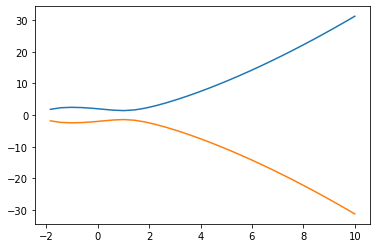

In [14]:
%matplotlib inline
import numpy as np
import pylab as pl

def f(x):
    return x**3 -3*x + 4

xa = np.mgrid[-10:10:50j] # box array
y = list()
x = list()
for i in range(0,len(xa)):
    _x = xa.ravel()[i] # 2d to 1d array
    _y=f(_x)
    if _y> 0:
        y.append(np.sqrt(_y))
        x.append(_x)
pl.plot(x, y, "-")
pl.plot(x, [-yi for yi in y], "-")
pl.show()

#### Elliptic curve 연산

Public key는 타원곡선 상의 곱셈 연산으로 구하게 된다.
* **더하기** 연산
    * Elliptic Curve에 2 점을 선택해 직선을 그으면 한 점과 반드시 교차하게 된다.
    * x축에 수직으로 내려서 곡선과 만나는 점을 구하면 덧셈이 된다. 즉 **R의 대칭점**이다.
* **곱하기** 연산
    * 자신의 접점에서 더하기 과정을 하면 곱셈이 된다.
    * 접점은 당연히 P,Q가 동일해서 한 점이 되는 경우이고, 이 점에서 **접선 tangent line**을 그어서 만난 **R의 대칭점**이다. 그 결과는 P+P=2P, 즉 2를 곱해서 얻은 값이다. 


![alt text](figures/4_ecdsa_add.png "ecdsa addition")

#### 더하기 연산으로 구하는 PubKey
시작점 'Generator' G에 정수k를 계속 더하면 또는 2를 곱해 나가면, 그 결과 값인 P는 커브에 존재하는 점으로 계산된다.

```python
P=k*G
```

이 때 **k가 privKey**, **P가 pubKey**가 된다.
즉 pubKey는 privKey에서 생성되며, 타원곡선 상에 존재하는 **x,y 좌표 값**이다.
privKey는 256비트 **1 ~ $2^{256}$에 존재하는 하나의 값**이므로, 그 사이의 수만큼 계속 더해야 또는 곱해 나가야 Public key가 된다.
```python
pubKey = privKey * G
```

그렇다면 **pubKey는 공개키이고 이로부터 비밀번호에 해당하는 privKey를 알아낼 수** 있을까? 여기서 ```PubKey=privKey * G```는 계산이 상대적으로 매우 빠르고 쉽지만, 역으로 ```pubKey/G=privKey``` 즉 **pubKey에서 privKey를 계산해 내기는 거의 불가능하다**. G를 계속 privKey 횟수 만큼 빼주어야 찾을 수 있다. **privKey의 평균 값인 $2^{128}$** 340,282,366,920,938,463,463,374,607,431,768,211,456 횟수를 적어도 시도해야 한다.
아무리 성능이 좋은 컴퓨터라하더라도 그 횟수만큼 연산해서 privKey 암호를 해킹하는 것은 매우 어렵다는 의미이다.

출처: Mastering Bitcoin p.70
![alt text](figures/4_ecdsa.png "ecdsa multiplication")

Python으로 Elliptic Curve를 생성해보자.
그러기 위해서는 라이브러리 Pycoin을 설치해야 한다.
동일한 명칭으로 cdecker/pycoin, richardkiss/pycoin 2개가 있으니, 주의해서 후자를 설치한다. 매뉴얼에 3.6, 3.7을 지원한다고 했지만 최신 버전은 잘 설치가 되지 않는다. python2로 해보거나, python3에서는 pycoin 버전을 낮추어서 0.77로 해보자.

```python
pip install pycoin==0.77
pip install python2-secrets #python2에서 사용하려면
```

pycoin이 잘 설치 되었으면, 명령창에서 ku ("key utility")를 입력하면 해당 키가 출력된다 (https://github.com/richardkiss/pycoin/blob/master/COMMAND-LINE-TOOLS.md). 참고로 ku는 BIP32 키, WIF, 비트코인 및 알트코인 주소를 지원한다.

```python
> ku 1
input           : 1
network         : Bitcoin mainnet
netcode         : BTC
secret exponent : 1
 hex            : 1
wif             : KwDiBf89QgGbjEhKnhXJuH7LrciVrZi3qYjgd9M7rFU73sVHnoWn
 uncompressed   : 5HpHagT65TZzG1PH3CSu63k8DbpvD8s5ip4nEB3kEsreAnchuDf
```

#### 유한체 Ellitic curve

**유한체 타원곡선 Elliptic curve over the finite field**는 modulus 연산을 하여 범위를 넘어서는 경우를 제한하게 된다.
**더하기 또는 곱하기를 하여도 그 결과는 항상 유한체에 존재**하게 된다. 따라서 x,y 좌표로 생성된 **pubKey는 그 크기가 일정 범위 $2^{512}$**에 있게 된다.
상수 a=-3, b=4, modulus=29인 타원곡선을 식으로 표현하면:

$E_{29}(-3,4)$

$y^2\ mod\ 29 =x^3-3x+4\ mod\ 29$

먼저 타원곡선 함수를 정의해보자.

In [1]:
import pycoin.ecdsa as ecdsa

e=ecdsa.ellipticcurve.CurveFp(29,-3,4)
print(e.p(), e.a(),e.b())

29 -3 4


특정 요소가 타원곡선에 존재하는지 확인할 수 있다.
시작점 (0,2)와 (22,1)은 곡선 상에 존재하지만, (22,3)은 그렇지 않다.

In [2]:
print("should be True (on curve) -> ", e.contains_point(0,2))
print("should be True (on curve) -> ", e.contains_point(22,1))
print("Should be False (not on curve) -> ", e.contains_point(22,3))

should be True (on curve) ->  True
should be True (on curve) ->  True
Should be False (not on curve) ->  False


G (0,2)는 시작점이고 곱셈으로 유한체 상의 요소를 생성해 보자.
그래프를 보면 타원곡선의 모양의 점들과 그래프 범위를 넘어선 경우 모듈러스 29 연산의 나머지를 표시한 점들을 볼 수 있다.

```python
1*G = (0, 2)
2*G = (6, 17)
3*G = (22, 1)
4*G = (23, 3)
5*G = (2, 8)
...
```

The generator point (0,2)
1 (0,2)
2 (6,17)
3 (22,1)
4 (23,3)
5 (2,8)
6 (7,6)
7 (17,9)
8 (21,3)
9 (13,25)
10 (3,15)
11 (19,22)
12 (14,26)
13 (28,8)
14 (8,17)
15 (15,17)
16 (15,12)
17 (8,12)
18 (28,21)
19 (14,3)
20 (19,7)
21 (3,14)
22 (13,4)
23 (21,26)
24 (17,20)
25 (7,23)
26 (2,21)
27 (23,26)
28 (22,28)
29 (6,12)
30 (0,27)


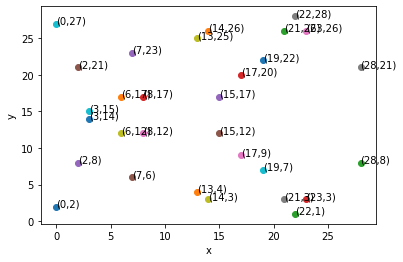

In [3]:
import numpy as np
import matplotlib.pyplot as plt

G=ecdsa.Point(e,0,2)
print("The generator point", G)
for k in range(1,31):
    print(k, str(k*G))
    P=k*G
    plt.scatter(P.x(),P.y())
    plt.text(P.x(),P.y(),str(P))

plt.xlabel('x')
plt.ylabel('y')
plt.show()

### secp256k1

비트코인, 이더리움 등 여러 암호화폐에서 사용하는 $y^2 = x^3 +7$이다.
a=0, b=7로 설정해 놓은 Elliptic curve이다.

SEC (Standards for Efficient Cryptography)에서는 secp256k1의 계산에 걸리는 **시간을 줄이기 위해 필요한 인자들을 미리 설정**해 놓았다.

T=(p,a,b,G,n,h)

prime p, elliptic curve 식의 a, b, 시작점 G, order of G(prime n, G를 자신에게 계속 더하면서 nG=O이 되는 n), cofactor h

구분 | 값
-----|-----
p | FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFE FFFFFC2F = 2256 - 232 - 29 - 28 - 27 - 26 - 24 - 1
a | 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000000
b | 00000000 00000000 00000000 00000000 00000000 00000000 00000000 00000007
G | 02 79BE667E F9DCBBAC 55A06295 CE870B07 029BFCDB 2DCE28D9 59F2815B 16F81798
n | FFFFFFFF FFFFFFFF FFFFFFFF FFFFFFFE BAAEDCE6 AF48A03B BFD25E8C D0364141
h | 01

#### 개인키

앞에서 private key를 생성해 보았지만, 여기서도 ecdsa함수에서 생성된 무작위 수가 privKey가 된다.
64자리 32바이트이다.

앞서 private key를 만들었지만, 여기서는 pycoin의 함수를 이용해서 하고 있고 앞서 배웠던 secp256k1을 이용하고 있다. 라이브러리가 서로 차이가 있어서 그러한 것으로 이해하자.

Python secrets은 SystemRandom 클래스를 사용하여 무작위수를 생성하는 모듈
```randbelow()```는 괄호 이하의 무작위 수를 생성한다.

In [5]:
#import sha3
import secrets

privKey=secrets.randbelow(ecdsa.generator_secp256k1.order())
print("private key: ", privKey)
print("private key in hex: ", hex(privKey))

private key:  40034149583127385413478769131684882098967338328596335008981396196007053197646
private key in hex:  0x58828692b677adad9968126a6c7f616f781f812fbbffd9808a5fd9528c09814e


#### 공중키

secp256k1 시작점와 privKey의 곱셈 연산에서 pubKey를 구한다.

In [10]:
pubKey = (ecdsa.generator_secp256k1 * privKey).pair()
print("pubKey: ", pubKey)

pubKey:  (103442033013058572186735026422844771015168828891024181654904872957654540846530, 92055239175760766353358757958203621475715954265552208040754573482292319986180)


#### 사인

```hashlib.sha3_256()``` 해싱함수로 해싱을 한다.
```int.from_bytes()```는 Python 명령어로 바이트로부터 정수를 생성한다.
그리고 ```sign(ecdsa.generator_secp256k1,privKey,msgHash)``` 사적키로 메시지의 해시에 대해 secp256k1 사인을 한다.

In [11]:
import hashlib
import codecs

msg="let's meet in my office at 10 in the morning."
hashBytes = hashlib.sha3_256(msg.encode("utf8")).digest()
#msgHash=int(codecs.encode(hashBytes, 'hex'), 16) # python2 & 3
msgHash=int.from_bytes(hashBytes, byteorder="big") # was working for python3
signature=ecdsa.sign(ecdsa.generator_secp256k1,privKey,msgHash)
print("signature: ", signature)

signature:  (110664897255293244342540125280461064568419285481301766086785016587086008744159, 97425969493976298185291598383486380755479570154305231471558062074802186715388)


#### 인증

```verify(ecdsa.generator_secp256k1,pubKey,msgHash,signature)```는 공중키로 사인된 메시지를 인증한다. 여기서 보듯이 공중키로 인증을 한다.

In [12]:
valid=ecdsa.verify(ecdsa.generator_secp256k1,pubKey,msgHash,signature)
print("valid: ", valid)

valid:  True


## 문제 4-3: 마이닝 해보기
<a id='4-3'></a>

geth를 시작할 때부터 마이닝 옵션을 설정할 수 있다.
```--mine```은 마이닝을 실행하겠다는 옵션이고
```--minerthreads```는 마이닝에 몇 개의 CPU 쓰레드를 사용할 것인지 (기본은 0)
```--datadir```는 현재 geth가 실행되고 있는 디렉토리이다.
```python
$ geth --datadir "./eth" --mine --minerthreads=4 --port 30445
```

또는 geth console에서 마이닝을 할 수 있다.
사적망에서는 자신이 거래를 발생시키고, 그 한 건만을 마이닝할 수 있다.
물론 공중망이나 테스트망에서는 마이닝을 별도로 실행할 필요가 없지만 말이다.
1 건만 마이닝할 경우는 그 숫자를 인자로 넘겨주면 된다.

```python
> miner.start(1);admin.sleepBlocks(1);miner.stop()
```


In [69]:
!geth --exec "miner.start(1);admin.sleepBlocks(1);miner.stop()" attach http://117.16.44.45:8445

null


### 4.2.6 Wallet

Wallet은 우리가 일상생활에서 사용하는 현금, 신용카드 등을 가지고 있는 지갑과 비슷하다.
Wallet은 **계정, private key**를 가지고 있는 파일 또는 데이터베이스를 말한다.
단순히 계정만을 가지고 있지 않고 **블록체인과 인터페이스**하는 기능도 제공하기도 한다.
잔고를 조회하거나 스마트계약을 블록체인에 배포하는 등의 기능도 제공한다.

지갑은 주소를 생성하는 기능도 있는데, 매번 완전히 새롭게 생성하지 않고 **HD Hierarchical Deterministic** 방식으로 하나의 마스터 시드 Seed 키에서 다수의 주소를 생성할 수 있다. 이런 암호화페 지갑을 계층적 결정 지갑이라고 한다. 

Wallet은 여러 종류가 있다.
존재하는 형태에 따라 PC Wallets, 모바일 Wallets, 하드웨어 wallets, USB wallets, 종이형태의 wallets이 있다. QR코드 형식으로 만들어진 Wallet도 있다.
소프트웨어 형식으로 존재하는 MetaMask, Mist, MyCrypto (https://mycrypto.com) 등을 사용할 수도 있다.

geth는 cli방식의 wallet. 계정을 만들고, 입출금, 전송을 할 수 있다. 계약을 만들 수도 있다.
wallet은 네트워크에 저장되어 있지 않고, 사용자 컴퓨터 <DATADIR>/keystore에 있다. 형식은 UTC--{year}-{month}--{account}.
* public key - 누구나 사용할 수 있는 키. 통장번호와 같다.
* private key - 당사자만 가지고 있는 키. 통장의 비밀번호 PIN 또는 수표의 서명과 같다.

In [52]:
!geth --exec 'personal.listWallets' attach http://117.16.44.45:8445

[{
    accounts: [{
        address: "0x21c704354d07f804bab01894e8b4eb4e0eba7451",
        url: "keystore:///home/jsl/eth/keystore/UTC--2019-01-03T21-57-03.966937024Z--21c704354d07f804bab01894e8b4eb4e0eba7451"
    }],
    status: "Unlocked",
    url: "keystore:///home/jsl/eth/keystore/UTC--2019-01-03T21-57-03.966937024Z--21c704354d07f804bab01894e8b4eb4e0eba7451"
}, {
    accounts: [{
        address: "0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480",
        url: "keystore:///home/jsl/eth/keystore/UTC--2019-01-04T01-40-01.674920065Z--778ea91cb0d0879c22ca20c5aea6fbf8cbeed480"
    }],
    status: "Locked",
    url: "keystore:///home/jsl/eth/keystore/UTC--2019-01-04T01-40-01.674920065Z--778ea91cb0d0879c22ca20c5aea6fbf8cbeed480"
}]


## 연습문제

아래를 자바스크립트파일 ```exercise1.js```로 저장하고
명령창에서 geth --exec로 실행하세요.
출력은 메시지도 같이 ```console.log("Block Number:" , eth.blockNumber)```와 같이 출력한다.

문제를 풀면서, geth 창에 발생하는 로그를 관찰해보자.
실행과 결과화면 한 화면에 나오도록 해서 화면을 제출한다.

아래 문제를 풀기 전, 우선 계정을 2개 더 생성한다.
각 계정의 잔액을 5 ether 이상이 되도록 충전한다.

1. 현재 블록번호를 출력
2. 자신의 enode 값을 출력
3. peer가 있는지? 있으면 그 peer를 출력
4. 계정 목록을 출력
5. 각 계정의 잔액을 ether로 출력
6. 코인베이스를 2번째로 변경하고, 변경전과 변경후의 coinbase를 출력
7. 현재 대기하는 트랙잭션 수를 출력. 없다면 그 이유를 메시지로 출력
8. 현재 블록번호를 출력. 블록번호가 처음 출력했을 때와 변동이 있는지? 계정을 출력하거나, 잔고를 출력하는 등 몇 차례 작업이 있었는데도 불구하고 블록 번호가 그대로인 이유를 메시지로 출력.

In [11]:
%%writefile src/exercise1.js
console.log("- Block Number: ", eth.blockNumber);
console.log("- Enode: ", admin.nodeInfo.enode);
console.log("- Peers: ", admin.peers);
console.log("- Accouts: ", personal.listAccounts);
var bal=eth.getBalance(eth.coinbase);
console.log('- balance in ether: ', web3.fromWei(bal, "ether"));
console.log('- Before: ', eth.coinbase);
miner.setEtherbase(eth.accounts[1]);
var oldCoinbase = eth.coinbase;
miner.setEtherbase(eth.accounts[1]);
console.log('- Before: ', oldCoinbase, ' ---> After: ', eth.coinbase);
console.log('- txpool pending: ', txpool.status.pending);
console.log('==> No transactions have been sent so far, so neither pending nor queued at all');
console.log("- Block Number: ", eth.blockNumber);
console.log('==> No transactions were mined, so block number was not increased');

Overwriting src/exercise1.js


In [12]:
!geth --exec "loadScript('src/exercise1.js')" attach http://117.16.44.45:8445

- Block Number:  47619
- Enode:  enode://41c245cea7c9287f9f2850981b5c95f0367ddd1bcb737e6eee623c619b94ac8770cc4ec38119ae2ce72dd5104c601d947a82e9273415005c0d875469a12c6533@117.16.44.45:38445
- Peers:  
- Accouts:  0x21c704354d07f804bab01894e8b4eb4e0eba7451,0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480,0x71028fc6dc0713d3f7416ac5eba7dbea26f0383e,0x750c79253dc3bff94d6b46da5b833ff761a4a665,0x9261f95c7c5ac4a0083007f9c592b1cb1b4ac8be,0x94e7e2be1707e665fad2bf86d5f5687774060ebd,0xa092d003a2e08bdb6a24079c2d0c69ff23f63eb0,0xcd0c4191a2106c134a87021854baa4d35c01f7ba,0x68d804e568cd6d0db6473251ff521458e4edc095,0x5aeac170c669e1a83dd1c15f22813532d8d762b1,0x37e715009ffb12fcd1051e76edffedb513d830fd,0xffa4658ff14e486a3a57cc7163c153724c9d1904,0xb50970d977fe010dfb6f6759bb5c832a8ef0017b,0xa33281e32fcf19ff284e0381bcfb426f5e7c0f58
- balance in ether:  184.999843393999999444
- Before:  0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480
- Before:  0x778ea91cb0d0879c22ca20c5aea6fbf8cbeed480  ---> After:  0x778ea91cb0d0879c22

## 연습문제

#### hash
1907년 고종의 a plea for korea로 알려진 "헤이그 만국 평화 회의에 고하는 글"의 전문 중 "일본인들은 대한제국 황제 폐하의 정식 허가 없이 행동하였다."라는 문장이 있다.
영문으로는 "The Japanese acted without the consent of his Majesty the Emperor of Korea."이다. 이 문장의 without을 with로 일본측에서 위조했다고 하자.
즉:
* (원본) "The Japanese acted without the consent of his Majesty the Emperor of Korea."
* (위조) "The Japanese acted with the consent of his Majesty the Emperor of Korea."

파이썬 프로그램으로:
* 1) 원본을 해싱하고 출력
* 2) 위조를 해싱하고 출력
* 3) 원본은 위조보다 영어 3 글자가 많다. 원본과 위조에서 구한 해시의 바이트 수와 차이를 출력

#### 인증
위 고종의 헤이그 만국 평화 회의에 고하는 글은 끝내 전해지지 못했다.
현재의 블록체인 기술을 사용하였다면 원문을 무사히 전달했을 수 있어서 아쉽다.
* 1) 위 문장1)을 사인해서 인증해 보세요. 사인과 인증 결과를 출력
* 2) 문장2)를 사인하고, 1)과 다른지 비교하고, 인증 결과를 출력

## 연습문제: 마이닝 한 건에 얼마나 충전이 되었는지 알아보기

- 코인베이스 출력
- 코인베이스의 잔고 출력
- 마이닝 1건 실행
- 잔고 증가분을 계산하여 출력
